## About this file

**The dataset consists of 17 columns, each representing the following attributes:**

• age: Customer's age.

• job: Customer's occupation.

• marital: Customer's marital status.

• education: Customer's level of education.

• default: Whether the customer has credit in default.

• balance: Customer's average yearly balance.

• housing: Whether the customer has a housing loan.

• loan: Whether the customer has a personal loan.

• contact: Type of communication contact with the customer.

• day: Last contact day of the month.

• month: Last contact month of the year.

• duration: Last contact duration in seconds.

• campaign: Number of contacts performed during this campaign for the customer.

• pdays: Number of days since the customer was last contacted from a previous campaign.

• previous: Number of contacts performed before this campaign for the customer.

• poutcome: Outcome of the previous marketing campaign.

• deposit: Whether the customer subscribed to a term deposit.

## 1. Import:

In [202]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

**Let's load the data.**

In [203]:
data_list = []
for i in os.listdir():
    if ".csv" in i:
        data_list.append(i)

df = pd.read_csv(data_list[0])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Begin the basic analysis by retrieving fundamental information about the dataset.**

In [204]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [205]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [206]:
print(df.contact.value_counts().to_frame())
print(df.poutcome.value_counts().to_frame())

           count
contact         
cellular   37327
unknown    15366
telephone   3680
          count
poutcome       
unknown   45285
failure    6129
success    2582
other      2377


**Correlation:**

In [207]:
num_df = df.select_dtypes(include = np.number)
num_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.101250,-0.007360,-0.001533,0.002417,-0.017132,0.005828
balance,0.101250,1.000000,0.005596,0.024846,-0.015123,0.007454,0.020500
day,-0.007360,0.005596,1.000000,-0.027839,0.157817,-0.089853,-0.053414
duration,-0.001533,0.024846,-0.027839,1.000000,-0.078064,-0.001250,0.001425
campaign,0.002417,-0.015123,0.157817,-0.078064,1.000000,-0.092324,-0.037217
pdays,-0.017132,0.007454,-0.089853,-0.001250,-0.092324,1.000000,0.466584
previous,0.005828,0.020500,-0.053414,0.001425,-0.037217,0.466584,1.000000


## 2. Preparing the dataset for visual analysis:

In [208]:
bins = np.linspace(min(df.age), max(df.age), 6)
g_names = ["lower_age", "lower_mid_age", "mid_age","higher_mid_age", "higher_age"]
df["binned_age"] = pd.cut(df.age, bins, labels = g_names, include_lowest = True)

In [209]:
bins = np.linspace(min(df.balance), max(df.balance), 6)
g_names = ["lower_bal", "low_mid_bal", "mid_bal","high_mid_bal", "higher_bal"]
df["binned_bal"] = pd.cut(df.balance, bins, labels = g_names, include_lowest = True)

In [210]:
age_vs_bal = df[["binned_age", "balance"]]
age_vs_bal = age_vs_bal.groupby(["binned_age"], as_index = False).mean()

In [211]:
age_vs_bal.head()

,binned_age,balance
0,lower_age,1148.510558
1,lower_mid_age,1312.683792
2,mid_age,1740.095653
3,higher_mid_age,2696.416263
4,higher_age,3486.504950


In [212]:
dict_deposit = {"yes": 1, "no": 0}
df["deposit_n"] = df.deposit.map(dict_deposit)

In [213]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [214]:
dict_marital = {'married': 1, 'single': 0, 'divorced': 2}
df["marital_n"] = df.marital.map(dict_marital)

## 3. Data Visualization:

**Age and Deposit**

<Axes: xlabel='age', ylabel='deposit_n'>

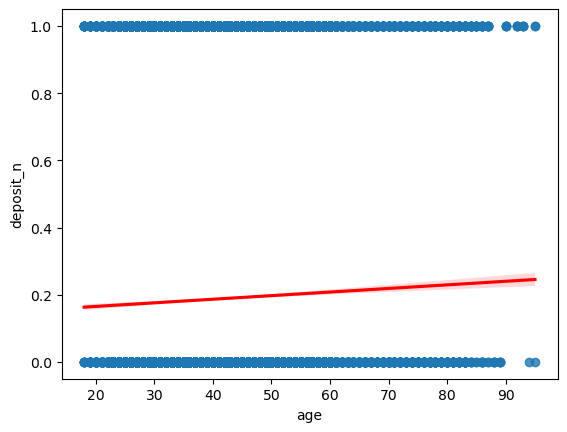

In [215]:
sns.regplot(x = "age", y = "deposit_n", data = df, line_kws = {"color": "red"})

<Axes: xlabel='binned_age', ylabel='deposit_n'>

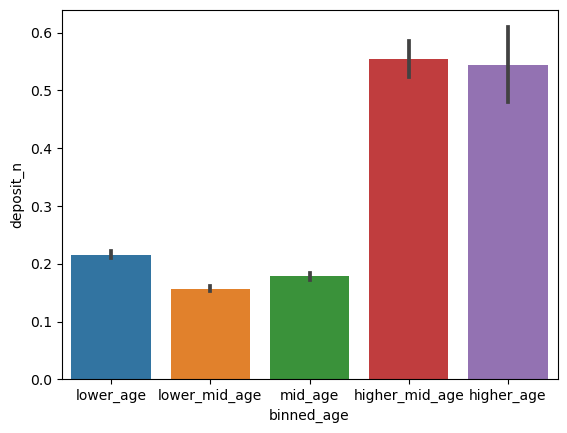

In [216]:
sns.barplot(x="binned_age", y="deposit_n", data=df)

**Age and Balance**

<Axes: xlabel='binned_age', ylabel='balance'>

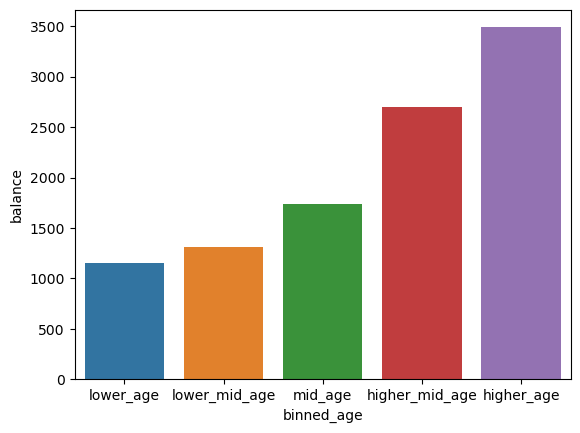

In [217]:
sns.barplot(x = "binned_age", y = "balance", data = age_vs_bal)

**Marital and Balance**

<Axes: xlabel='marital', ylabel='balance'>

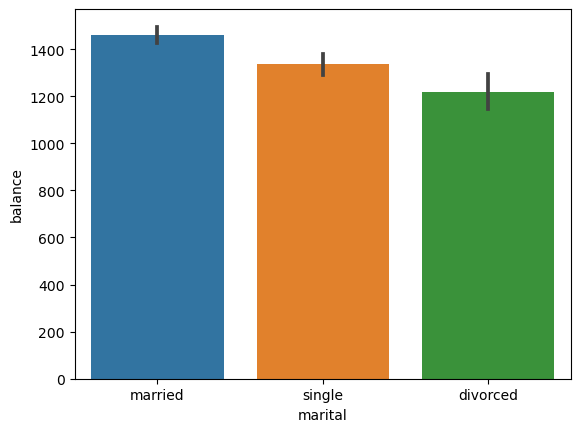

In [218]:
sns.barplot(x = "marital", y = "balance", data=df)

**Marital and Deposit**

<Axes: xlabel='marital', ylabel='deposit_n'>

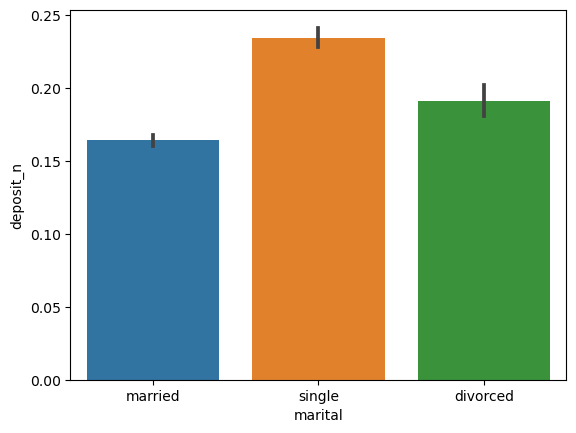

In [219]:
sns.barplot(x = "marital", y = "deposit_n", data=df)

**Education and Balance**

<Axes: xlabel='education', ylabel='balance'>

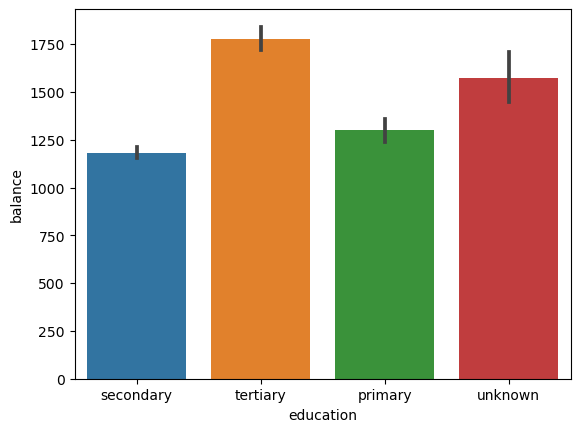

In [220]:
sns.barplot(x = "education", y = "balance", data=df)

**Education and Deposit**

<Axes: xlabel='education', ylabel='deposit_n'>

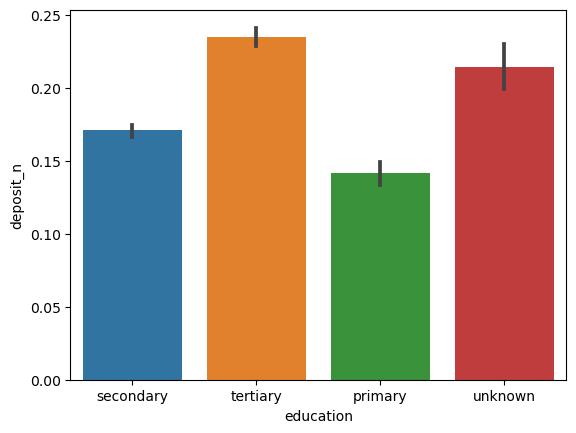

In [221]:
sns.barplot(x = "education", y = "deposit_n", data=df)

**Housing and Balance**

<Axes: xlabel='housing', ylabel='balance'>

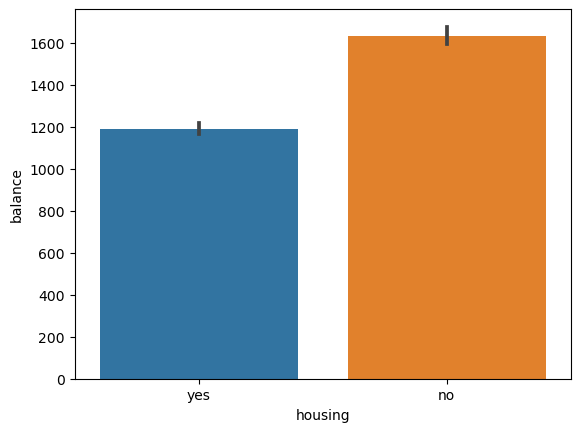

In [222]:
sns.barplot(x = "housing", y = "balance", data=df)

**Housing and Deposit**

<Axes: xlabel='housing', ylabel='deposit_n'>

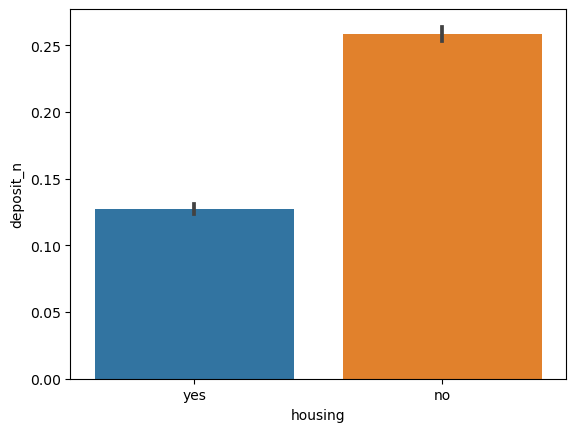

In [223]:
sns.barplot(x = "housing", y = "deposit_n", data=df)

**Loan and Balance**

<Axes: xlabel='loan', ylabel='balance'>

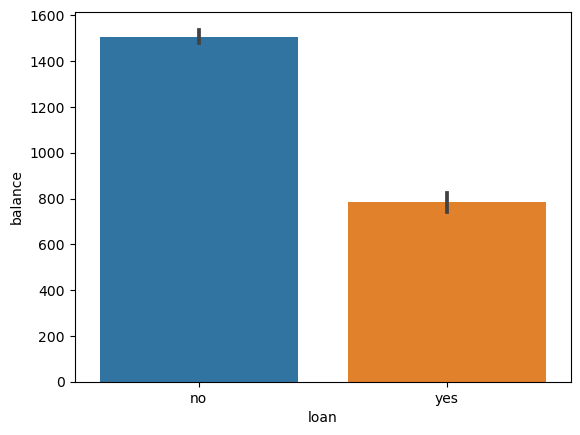

In [224]:
sns.barplot(x = "loan", y = "balance", data=df)

**Loan and Deposit**

<Axes: xlabel='loan', ylabel='deposit_n'>

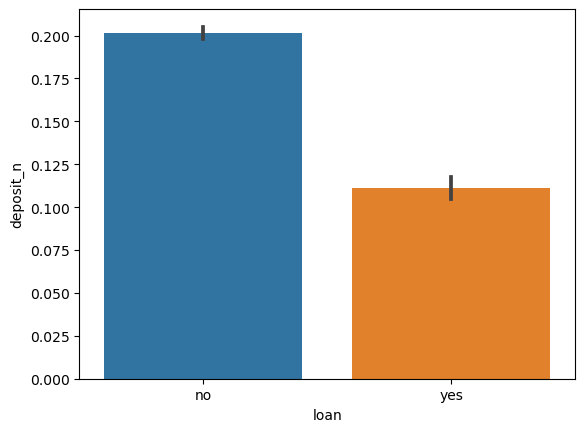

In [225]:
sns.barplot(x = "loan", y = "deposit_n", data=df)

## 4. Observations:

We've generated some plots to understand the internal relations between our independent variables.
As we can see from the plots,
- people who are married has more balance in their account followed by singles and divorced.
- people with higher_mid_age and higher_age have term deposit.
- Also, people with higher_mid_age and higher_age have more balance in their accounts.

Let's investigate whether their occupations have any significant impact on term deposits and their account balances. Although it seems evident that job types might affect balances, let's plot the data to confirm this assumption.

**Job and Balance**

[Text(0, 0, 'admin.'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'services'),
 Text(3, 0, 'management'),
 Text(4, 0, 'retired'),
 Text(5, 0, 'blue-collar'),
 Text(6, 0, 'unemployed'),
 Text(7, 0, 'entrepreneur'),
 Text(8, 0, 'housemaid'),
 Text(9, 0, 'unknown'),
 Text(10, 0, 'self-employed'),
 Text(11, 0, 'student')]

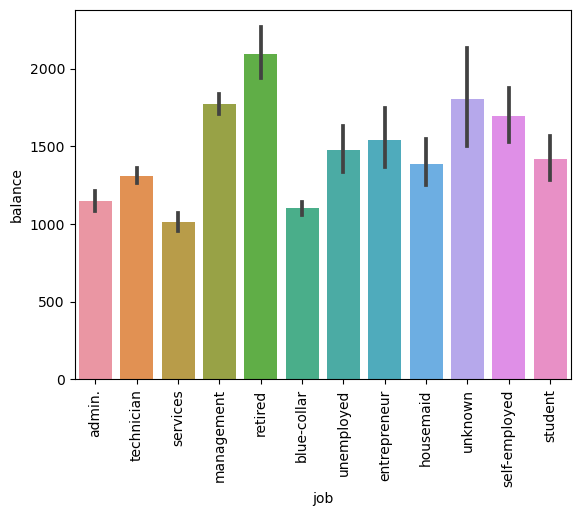

In [226]:
sns.barplot(x="job", y="balance", data=df).set_xticklabels(labels = df.job.unique(), rotation=90)

**Job and Deposit**

[Text(0, 0, 'admin.'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'services'),
 Text(3, 0, 'management'),
 Text(4, 0, 'retired'),
 Text(5, 0, 'blue-collar'),
 Text(6, 0, 'unemployed'),
 Text(7, 0, 'entrepreneur'),
 Text(8, 0, 'housemaid'),
 Text(9, 0, 'unknown'),
 Text(10, 0, 'self-employed'),
 Text(11, 0, 'student')]

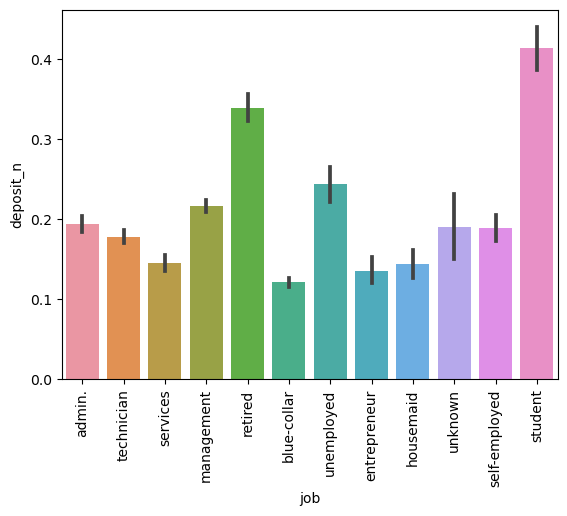

In [227]:
sns.barplot(x="job", y="deposit_n", data=df).set_xticklabels(labels=df.job.unique(), rotation = 90)

As we can see,
- students are on the top followed by retired people when it comes to term deposit

## 5. Preparing the data for machine learning:

- we only need age, job, marital, education, balance, housing, loan and deposit from the dataframe.
- we have already converted deposit column into {"yes": 1, "no": 0}.
- we will apply one-hot encoding to the following columns: marital, housing and loan.
- we will apply binary encoding to the following columns: job and education.
- we will normalize the column "balance".

In [228]:
dummy_var = pd.get_dummies(df[["marital", "housing", "loan"]])
df = pd.concat([df, dummy_var], axis = 1)

In [229]:
column_names = pd.DataFrame(df.columns, columns = ["cols"])
column_names

,cols
0,age
1,job
2,marital
3,education
4,default
5,balance
6,housing
7,loan
8,contact
9,day


In [230]:
# let's remove the columns we do not need:

data = df.drop(columns = df.columns[[2,4,6,7,8,9,10,11,12,13,14,15,17,18,20]], axis = 1)

In [231]:
#  Let's normalize balance and age column:

data.balance = data.balance/data.balance.max()
data.age = data.age/data.age.max()

In [232]:
#Import

from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [233]:
x = data.drop(["deposit", "deposit_n", "balance"], axis=1)
y = data.deposit_n

In [234]:
encoder = BinaryEncoder(cols = ["job", "education"])
encoder.fit(x)
x = encoder.transform(x).astype("float")

## 6. Model Training:

KNN

In [235]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [236]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN(n_neighbors=4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [237]:
pred = classifier.predict(x_test)

In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8052861873226111

Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [241]:
pred = classifier.predict(x_test)

In [242]:
accuracy_score(pred, y_test)

0.8100756859035004